In [7]:
# import sys
# !{sys.executable} -m pip install xgboost

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


#libraries for ML preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split


#libraries for models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [9]:
"""Load DataFrame"""
train_df = pd.read_csv('train_data.csv', encoding='latin-1')
train_df = pd.DataFrame(train_df)
train_df.head()

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,shipping_date,cost
0,27.22,105.59,26.91,108.67,0.513,0.195,True,24/04/17,0.247
1,25.00,109.79,25.34,108.59,0.484,0.195,True,27/07/17,0.248
2,27.10,105.60,29.35,106.54,0.484,0.195,True,03/02/17,0.276
3,24.72,106.25,23.43,109.78,0.504,0.195,True,03/04/17,0.276
4,22.33,108.37,29.38,111.50,0.484,0.195,True,08/11/18,0.553


In [10]:
test_df = pd.read_csv('test_data.csv', encoding='latin-1')
test_df = pd.DataFrame(test_df)
test_df.head()

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,shipping_date
0,25.33,110.99,22.66,109.60,0.205,0.195,True,02/01/17
1,26.06,106.17,24.87,111.16,0.155,0.195,True,02/01/17
2,24.71,107.21,23.42,106.87,0.484,0.195,True,02/01/17
3,25.76,109.61,23.20,107.02,0.445,0.069,True,02/01/17
4,26.91,108.67,23.26,109.42,0.497,0.067,True,02/01/17


# Pre-processing

## Dealing with missing values

In [11]:
train_df.isnull().sum()

origin_latitude          0
origin_longitude         0
destination_latitude     0
destination_longitude    0
weight                   0
loading_meters           0
is_adr                   0
shipping_date            0
cost                     0
dtype: int64

In [12]:
test_df.isnull().sum()

origin_latitude          0
origin_longitude         0
destination_latitude     0
destination_longitude    0
weight                   0
loading_meters           0
is_adr                   0
shipping_date            0
dtype: int64

In [19]:
df_new=train_df


### Outlier Detection

In [13]:
from IPython.display import display, Latex
outliers_condi = Latex(r" $\textbf{W𝑒 𝑐𝑎𝑛 𝑠𝑎𝑦 $𝑥_1$ or $x_2$ 𝑖𝑠 𝑜𝑢𝑡𝑙𝑖𝑒𝑟𝑠 if }\\ x_1 < Q1 - 1.5*IQR \\ or\\ x_2 > Q3+1.5*IQR $")
outliers_info = Latex(r"$L_{p} = \frac{p}{100}(n+1) = i_p.f_p \\ where \,\, i_p \,\, is \,\, integer \,\, part \,\, of \,\, L_p \,\, and \,\, f_p \,\, is \,\, fractional \,\, part \,\, of \,\, L_p \\ Q1 = Y_{25} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ Q3 = Y_{75} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ IQR = Q3-Q1 \\ x_1 = Q1 - 1.5*IQR \,\,and\,\, x_2 = Q3+1.5*IQR $")

display(outliers_info)
display(outliers_condi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
#it will return the range of the variables and the values outside this range will be outliers

def outliers(arr,col):
    x = sorted(arr[col].values.ravel())
    L_25 = 25/100*(len(x)+1) #L_p where p=25%
    i_p = int(str(L_25).split(".")[0])
    f_p = int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75 = 75/100*(len(x)+1) #L_p where p=75%
    i_p = int(str(L_75).split(".")[0])
    f_p = int(str(L_75).split(".")[1])
    q3 = x[i_p]+f_p*(x[i_p+1]-x[i_p])

    IQR = q3-q1
    x1 = q1-1.5*IQR
    x2 = q3+1.5*IQR
    
    return (x1,x2)

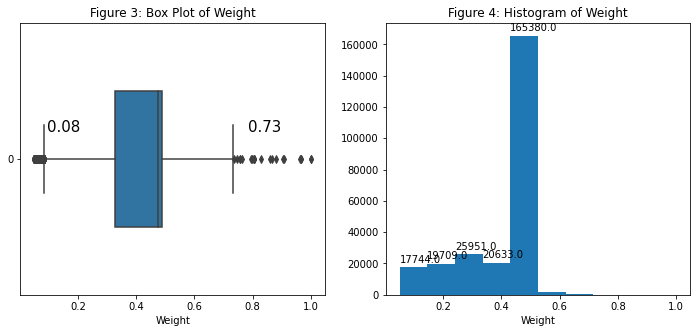

In [15]:
#Box Plot of Weight

#ploting boxplot

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
o1, o2 = outliers(train_df,'weight')
sns.boxplot(ax=ax1, data=sorted(train_df['weight']), orient='h', width=0.5)

ax1.set_xlabel("Weight")
ax1.set_title("Figure 3: Box Plot of Weight")
ax1.text(o1+0.01,-0.1,str(round(o1,2)), fontsize=15)
ax1.text(o2+0.05,-0.1,str(round(o2,2)), fontsize=15)

#ploting histogram
hist,bins=np.histogram(train_df['weight'])
n, bins, patches = ax2.hist(x = train_df['weight'], bins=bins)
ax2.set_xlabel("Weight")
ax2.set_title("Figure 4: Histogram of Weight")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))



plt.show()

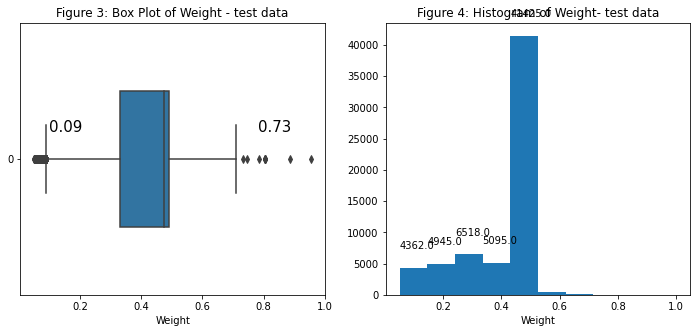

In [16]:
#Box Plot of Weight

#ploting boxplot

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
o1, o2 = outliers(test_df,'weight')
sns.boxplot(ax=ax1, data=sorted(test_df['weight']), orient='h', width=0.5)

ax1.set_xlabel("Weight")
ax1.set_title("Figure 3: Box Plot of Weight - test data")
ax1.text(o1+0.01,-0.1,str(round(o1,2)), fontsize=15)
ax1.text(o2+0.05,-0.1,str(round(o2,2)), fontsize=15)

#ploting histogram
hist,bins=np.histogram(train_df['weight'])
n, bins, patches = ax2.hist(x = test_df['weight'], bins=bins)
ax2.set_xlabel("Weight")
ax2.set_title("Figure 4: Histogram of Weight- test data")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))



plt.show()

Removing the outliers from the train set would affect badly to test-set. Tree based algorithms are expected to learn the outliers and extrapolate the values based on input data.




Exploratory Data Analysis
So far, outliers are removed. The next step is to do Data Analysis. Following are expected from Data Analysis

* **Pair-plots**: Type of distributions from pair-plot(as the name says, the features are considered in pairs).
* **Scatter plots**: Expected to provide the relation along X-Y coordinate
* **Correlation**: Coorelation applied to features in dataset, helps to know how correlated are the features with each other and with the target variable
* **Bar-plot of weight and cost** - Since it is shipping cost prediction, checking the variation of weight along with cost seems intuitive

In [20]:
df_new.head()

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,shipping_date,cost
0,27.22,105.59,26.91,108.67,0.513,0.195,True,24/04/17,0.247
1,25.00,109.79,25.34,108.59,0.484,0.195,True,27/07/17,0.248
2,27.10,105.60,29.35,106.54,0.484,0.195,True,03/02/17,0.276
3,24.72,106.25,23.43,109.78,0.504,0.195,True,03/04/17,0.276
4,22.33,108.37,29.38,111.50,0.484,0.195,True,08/11/18,0.553


In [21]:
print("Shape before process=",train_df.shape)
print("Shape After process=",df_new.shape)
diff = train_df.shape[0]-df_new.shape[0]
print("Total {} rows and {} cols removed".format(diff, train_df.shape[1]-df_new.shape[1]))

Shape before process= (251155, 9)
Shape After process= (251155, 9)
Total 0 rows and 0 cols removed


# Exploratory Data Analysis

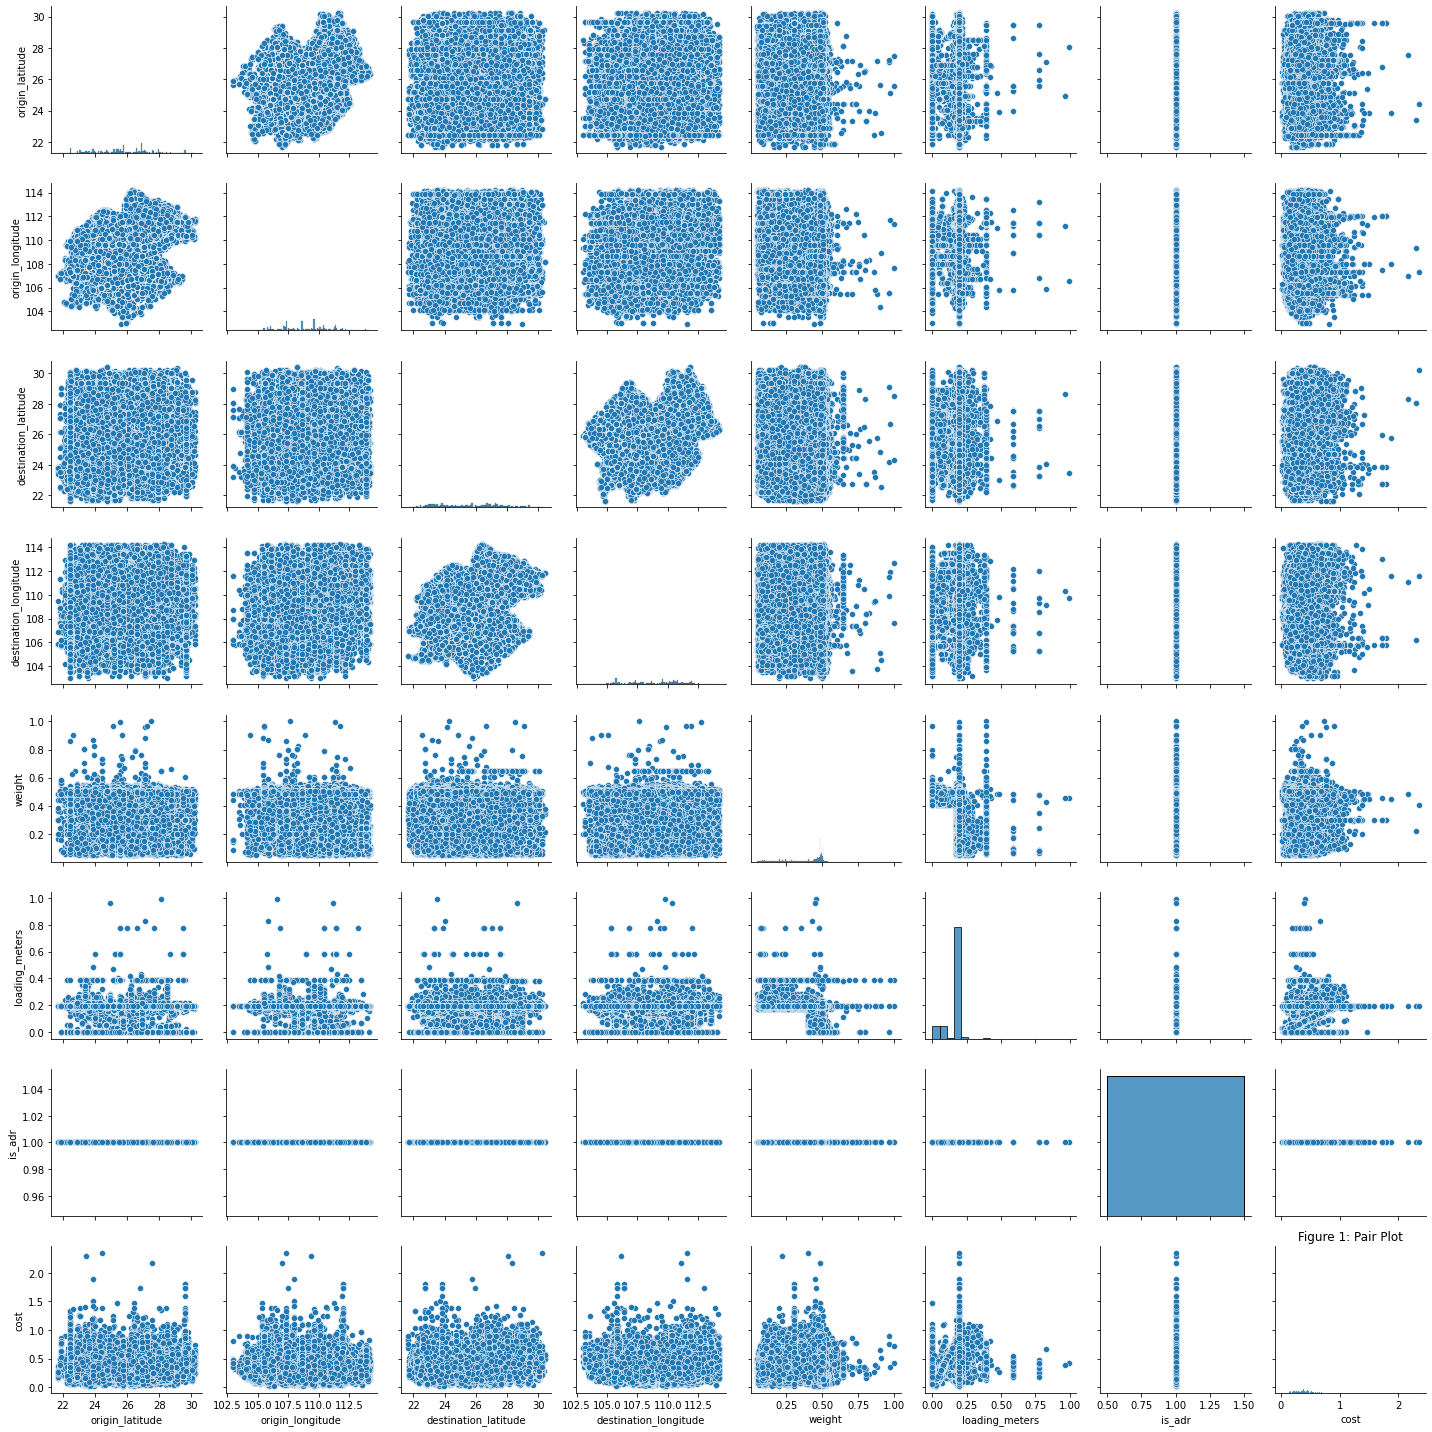

In [22]:
sns.pairplot(df_new)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.show()

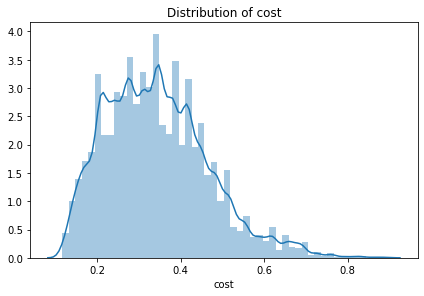

In [15]:
sns.distplot(df_new.cost)
plt.tight_layout()
plt.title("Distribution of cost")
plt.show()

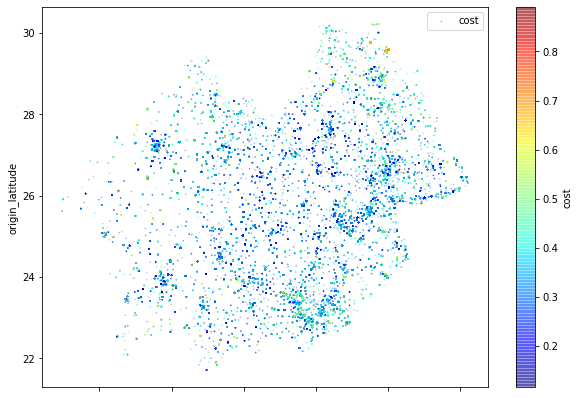

In [16]:
df_new.plot(kind="scatter", x="origin_longitude", y="origin_latitude",
    s=df_new['cost'], label="cost", c="cost", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

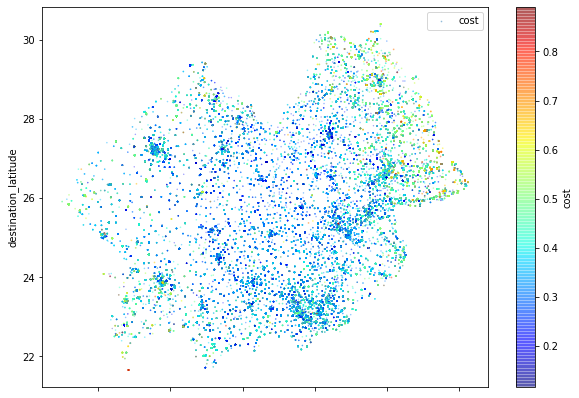

In [17]:
df_new.plot(kind="scatter", x="destination_longitude", y="destination_latitude",
    s=df_new['cost'], label="cost", c="cost", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

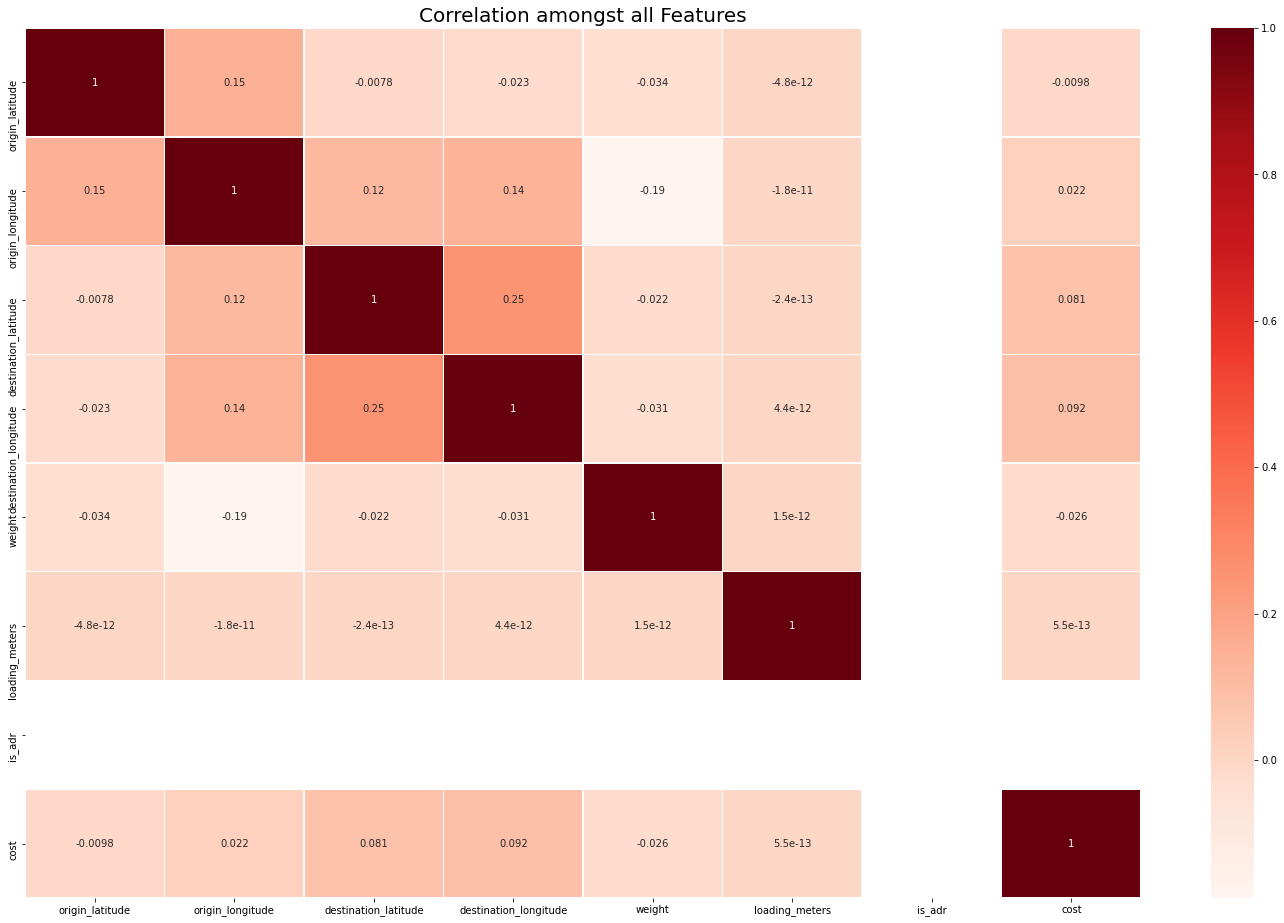

In [18]:
#Correlation Map of all Features in the dataset

plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df_new.corr(), annot = True, linewidths=.5, cmap='Reds')
hm.set_title(label='Correlation amongst all Features', fontsize=20)
hm;

In [19]:
# Extract Month from date 


map_months = {"shipping_month": {1: 'January', 2: 'February', 3: 'March', 4:'April', 
                                  5: 'May', 6: 'June', 7:'July', 8:'August',
                                  9: 'September', 10: 'October', 11:'November', 12:'December'}}


df_new['shipping_month'] = pd.DatetimeIndex(df_new['shipping_date']).month
df_new.drop(columns=['shipping_date'], axis=1)
df_new = df_new.replace(map_months)

test_df['shipping_month'] = pd.DatetimeIndex(test_df['shipping_date']).month
test_df.drop(columns=['shipping_date'], axis=1)
test_df = test_df.replace(map_months)

In [20]:
#Apply One-Hot Encoding so our model doesn't try to learn feature correlation that doesn't exist
df_new = pd.get_dummies(df_new, columns=["shipping_month"])
df_new

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,shipping_date,cost,shipping_month_April,...,shipping_month_December,shipping_month_February,shipping_month_January,shipping_month_July,shipping_month_June,shipping_month_March,shipping_month_May,shipping_month_November,shipping_month_October,shipping_month_September
0,27.22,105.59,26.91,108.67,0.513,0.195,True,24/04/17,0.247,1,...,0,0,0,0,0,0,0,0,0,0
1,25.00,109.79,25.34,108.59,0.484,0.195,True,27/07/17,0.248,0,...,0,0,0,1,0,0,0,0,0,0
2,27.10,105.60,29.35,106.54,0.484,0.195,True,03/02/17,0.276,0,...,0,0,0,0,0,1,0,0,0,0
3,24.72,106.25,23.43,109.78,0.504,0.195,True,03/04/17,0.276,0,...,0,0,0,0,0,1,0,0,0,0
4,22.33,108.37,29.38,111.50,0.484,0.195,True,08/11/18,0.553,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251147,27.10,105.60,27.00,108.38,0.484,0.195,True,16/11/18,0.276,0,...,0,0,0,0,0,0,0,1,0,0
251149,25.47,109.67,25.99,109.52,0.504,0.195,True,02/05/17,0.145,0,...,0,1,0,0,0,0,0,0,0,0
251150,25.14,111.73,26.10,106.74,0.322,0.195,True,15/08/18,0.511,0,...,0,0,0,0,0,0,0,0,0,0
251151,24.00,110.82,24.98,104.39,0.496,0.195,True,11/12/18,0.553,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#Apply One-Hot Encoding so our model doesn't try to learn feature correlation that doesn't exist
test_df = pd.get_dummies(test_df, columns=["shipping_month"])
test_df

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,shipping_date,shipping_month_April,shipping_month_August,shipping_month_December,shipping_month_February,shipping_month_January,shipping_month_July,shipping_month_June,shipping_month_March,shipping_month_May,shipping_month_November,shipping_month_October,shipping_month_September
0,25.33,110.99,22.66,109.60,0.205,0.195,True,02/01/17,0,0,0,1,0,0,0,0,0,0,0,0
1,26.06,106.17,24.87,111.16,0.155,0.195,True,02/01/17,0,0,0,1,0,0,0,0,0,0,0,0
2,24.71,107.21,23.42,106.87,0.484,0.195,True,02/01/17,0,0,0,1,0,0,0,0,0,0,0,0
3,25.76,109.61,23.20,107.02,0.445,0.069,True,02/01/17,0,0,0,1,0,0,0,0,0,0,0,0
4,26.91,108.67,23.26,109.42,0.497,0.067,True,02/01/17,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62784,26.95,107.65,27.34,109.93,0.151,0.195,True,31/01/19,0,0,0,0,1,0,0,0,0,0,0,0
62785,28.21,107.21,27.63,110.47,0.504,0.195,True,31/01/19,0,0,0,0,1,0,0,0,0,0,0,0
62786,23.85,110.43,25.52,110.43,0.484,0.195,True,31/01/19,0,0,0,0,1,0,0,0,0,0,0,0
62787,25.56,111.41,26.93,105.30,0.096,0.195,True,31/01/19,0,0,0,0,1,0,0,0,0,0,0,0


In [22]:
#Binary Encode is_apr column
df_new["is_adr"] = np.where(df_new["is_adr"] == True, 1, 0)
test_df["is_adr"] = np.where(test_df["is_adr"] == True, 1, 0)

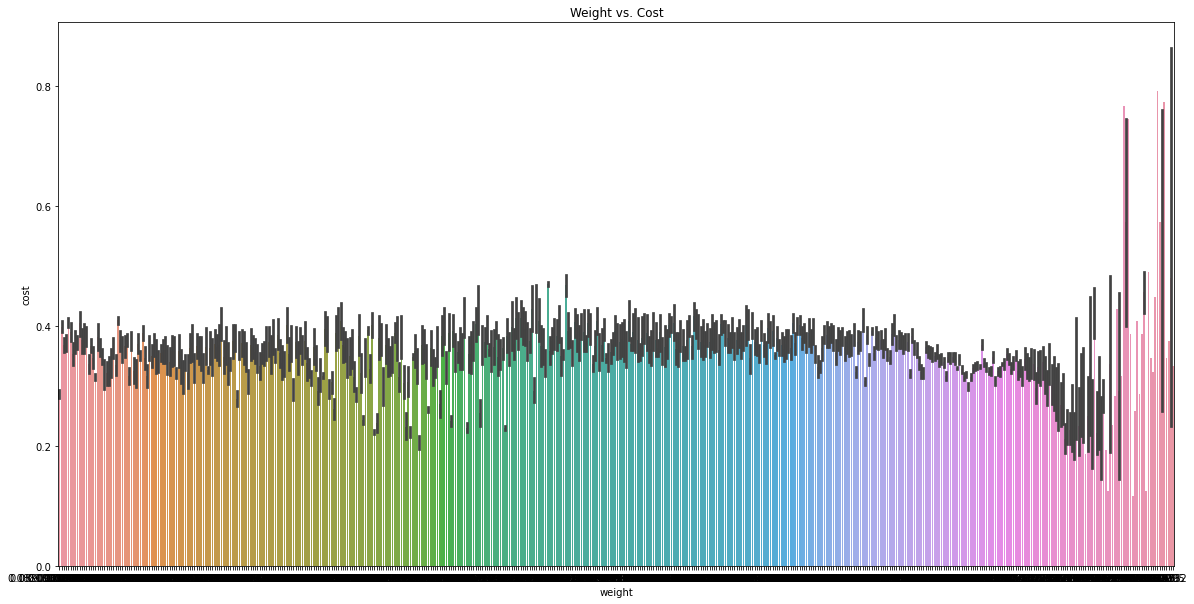

In [24]:
fig,axs=plt.subplots()
fig.set_size_inches(20,10)

p1=sns.barplot(x='weight',y='cost',data=df_new,ax=axs)
axs.set_title('Weight vs. Cost')


plt.show()

In [25]:
df_new.cost.describe()

count    185394.000000
mean          0.343208
std           0.123131
min           0.116000
25%           0.249000
50%           0.332000
75%           0.415000
max           0.891000
Name: cost, dtype: float64

In [26]:
df_new.weight.describe()

count    185394.000000
mean          0.398796
std           0.125097
min           0.085000
25%           0.302000
50%           0.472000
75%           0.488000
max           0.732000
Name: weight, dtype: float64

In [27]:
df_new.loading_meters.describe()

count    1.853940e+05
mean     1.950000e-01
std      2.499674e-13
min      1.950000e-01
25%      1.950000e-01
50%      1.950000e-01
75%      1.950000e-01
max      1.950000e-01
Name: loading_meters, dtype: float64

# Machine Learning Modelling

In [29]:
y = df_new.cost
X = df_new.drop(columns=['cost','shipping_date'], axis=1)

In [30]:
# Train, Test Split
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Define our models

models = {
    'RFR': RandomForestRegressor,
    'ADR': AdaBoostRegressor,
    'XGB': XGBRegressor,
    'BR': BaggingRegressor
}

In [43]:
#Function remove negative values from model predictions

def remove_neg(y_test, y_pred):
    ind = [index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred = y_pred[ind]
    y_test = y_test[ind]
    y_pred[y_pred < 0]
    return (y_test,y_pred)



# Function to fit each model 

def fit_model(name, model, train_ds, valid_ds):
    X, y = train_ds
    X_val, y_val = valid_ds
    
    # Fit and predict model
    model.fit(X, y)
    y_hat = model.predict(X)
    y_hat_val = model.predict(X_val)
    
    # Remove negative values from model predictions
    y_train, y_hat_train = remove_neg(y, y_hat)
    y_test, y_hat_test = remove_neg(y_val, y_hat_val)
    
    r2_ = r2_score(y_train, y_hat_train)
    r2_val = r2_score(y_test, y_hat_test)
    
    print(f'Model: {name}, Train R2 Score: {r2_}, Val R2 Score: {r2_val}')

In [44]:
# Fit each model and Perform Hyper-Parameter on number of estimators (Trees) for each Tree Algorithm

n_est = [10, 25, 50, 100, 125]
for i in range(len(n_est)):
    print(f'n_estimators: {n_est[i]}')
    for name, model in models.items():
        model = model(n_estimators=n_est[i])
        fit_model(name, model, (train_x, train_y), (valid_x, valid_y))
    print('-'*20)

n_estimators: 10
Model: RFR, Train R2 Score: 0.9444590273695219, Val R2 Score: 0.8212115659316778
Model: ADR, Train R2 Score: 0.3346449244487856, Val R2 Score: 0.33497921018402554
Model: XGB, Train R2 Score: 0.7465708892461815, Val R2 Score: 0.7449950295304419
Model: BR, Train R2 Score: 0.9440027293059395, Val R2 Score: 0.8222173857172694
--------------------
n_estimators: 25
Model: RFR, Train R2 Score: 0.9482567498363924, Val R2 Score: 0.827918628085907
Model: ADR, Train R2 Score: 0.195986594765316, Val R2 Score: 0.19564265551496052
Model: XGB, Train R2 Score: 0.7928437782822363, Val R2 Score: 0.7887897649084601
Model: BR, Train R2 Score: 0.9484287160635931, Val R2 Score: 0.8285730469179846
--------------------
n_estimators: 50
Model: RFR, Train R2 Score: 0.9497388967645081, Val R2 Score: 0.8299644317260766
Model: ADR, Train R2 Score: -0.04396553765297395, Val R2 Score: -0.045390254739020586
Model: XGB, Train R2 Score: 0.8252394105351992, Val R2 Score: 0.8171318475335203
Model: BR, Tr

n_estimators=100 is best for RandomForestRegressor, n_estimators=10 is best for AdaBoostRegressor,
n_estimators=125 is best for XGBoostRegressor and  n_estimators=125 is best for BaggingRegressor

In [46]:
#Create best models 
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor(n_estimators=10)
xgr = XGBRegressor(n_estimators=125)
bgr = BaggingRegressor(n_estimators=125)

# Fit models
rfr.fit(train_x, train_y)
abr.fit(train_x, train_y)
xgr.fit(train_x, train_y)
bgr.fit(train_x, train_y)

# Get models predictions
p1 = rfr.predict(valid_x)
p2 = abr.predict(valid_x)
p3 = xgr.predict(valid_x)
p4 = bgr.predict(valid_x)

# Score models 
m1 = r2_score(valid_y, p1)
m2 = r2_score(valid_y, p2)
m3 = r2_score(valid_y, p3)
m4 = r2_score(valid_y, p4)

# Score models by ensembling the ensembles
m5 = r2_score(valid_y, (p1+p2)/2)
m6 = r2_score(valid_y, (p1+p2+p3)/3)
m7 = r2_score(valid_y, (p1+p2+p3+p4)/4)

print(f'Ensemble R2: \nRFR: {m1}\nABR: {m2}\nXGR: {m3}\nBGR: {m4}\nRFR+ABR: {m5}\nRFR+ABR+XGR: {m6}\nRFR+ABR+XGR+BGR: {m7}')

Ensemble R2: 
RFR: 0.8315000010712968
ABR: 0.3320453895508456
XGR: 0.8341660888788186
BGR: 0.8315897667081062
RFR+ABR: 0.7174856017449764
RFR+ABR+XGR: 0.7863131490660404
RFR+ABR+XGR+BGR: 0.8120888681920575


### Feature Importance for each model

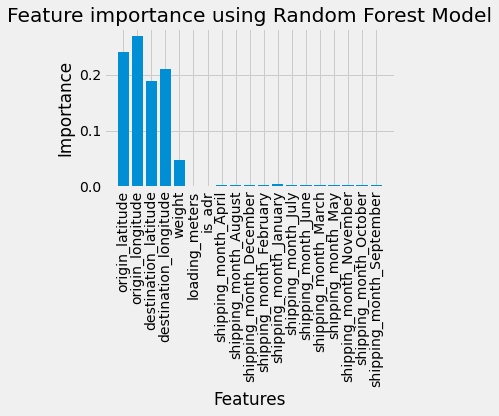

In [54]:
importances = rfr.feature_importances_
features = train_x.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Features'); 
plt.title('Feature importance using Random Forest Model')
plt.tight_layout()
plt.savefig('Random-Forest-Features-Importances.jpg',dpi=600)
plt.show();

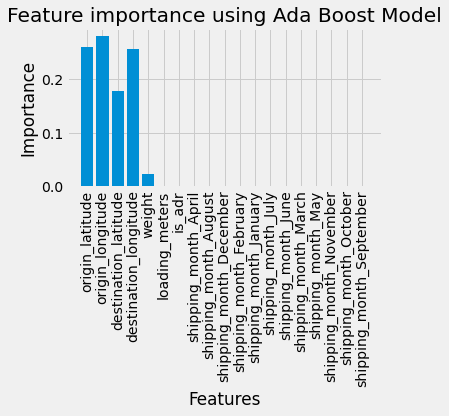

In [48]:
importances = abr.feature_importances_
features = train_x.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Features'); 
plt.title('Feature importance using Ada Boost Model')
plt.tight_layout()
plt.savefig('Ada-Boost-Features-Importances.jpg',dpi=600)
plt.show();

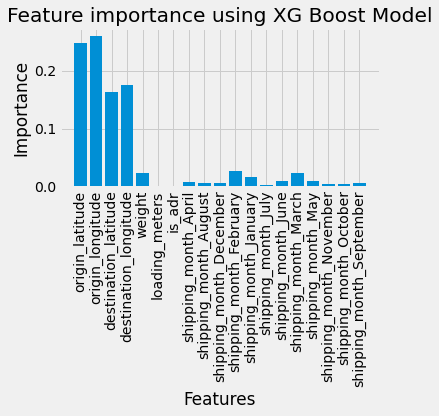

In [49]:
importances = xgr.feature_importances_
features = train_x.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Features'); 
plt.title('Feature importance using XG Boost Model')
plt.tight_layout()
plt.savefig('XG-Boost-Features-Importances.jpg',dpi=600)
plt.show();

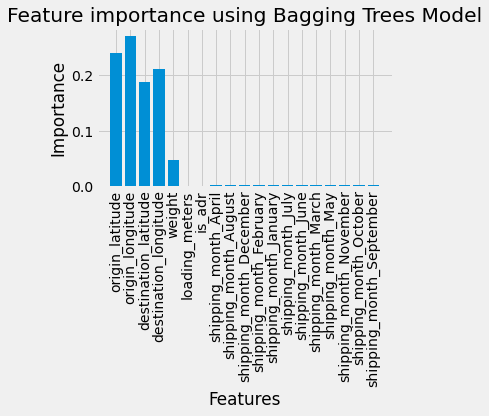

In [55]:
importances = np.mean([tree.feature_importances_ for tree in bgr.estimators_], axis=0)
features = train_x.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Features'); 
plt.title('Feature importance using Bagging Trees Model')
plt.tight_layout()
plt.savefig('Bagging-Trees-Features-Importances.jpg',dpi=600)
plt.show();

The first thought that came to mind is to use longitude and latitude as they currently are in the predictive model. But bear in mind that the scale of the two variables is different, so we needed to use a model that doesn’t require any normalization, like tree-based algorithms that we have used above. It can be observed that all tree algorthms view the origin and destination location as well as the weight of the item play a major role in the cost of a shipment. More information can be found here : https://heartbeat.fritz.ai/working-with-geospatial-data-in-machine-learning-ad4097c7228d

### Visualization of models learning process

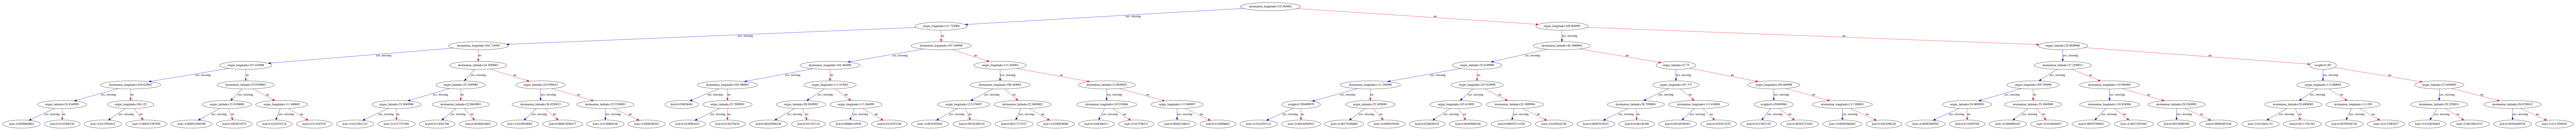

In [69]:
from xgboost import plot_tree

# plot 5 trees from xgboost model
plot_tree(xgr, num_trees=5)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('xgboost-trees.png')

## Testing 

In [80]:
test_data = test_df.drop(columns=['shipping_date'], axis=1)
predictions = xgr.predict(test_data)
test_data['predicted cost'] = predictions
test_data.head()

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,shipping_month_April,shipping_month_August,shipping_month_December,shipping_month_February,shipping_month_January,shipping_month_July,shipping_month_June,shipping_month_March,shipping_month_May,shipping_month_November,shipping_month_October,shipping_month_September,predicted cost
0,25.33,110.99,22.66,109.60,0.205,0.195,1,0,0,0,1,0,0,0,0,0,0,0,0,0.234190
1,26.06,106.17,24.87,111.16,0.155,0.195,1,0,0,0,1,0,0,0,0,0,0,0,0,0.424755
2,24.71,107.21,23.42,106.87,0.484,0.195,1,0,0,0,1,0,0,0,0,0,0,0,0,0.202633
3,25.76,109.61,23.20,107.02,0.445,0.069,1,0,0,0,1,0,0,0,0,0,0,0,0,0.324345
4,26.91,108.67,23.26,109.42,0.497,0.067,1,0,0,0,1,0,0,0,0,0,0,0,0,0.317506


In [81]:
test_data.to_csv('result.csv', index=False)